In [37]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [38]:
# 1. Read the CSV file
data = pd.read_csv("yds.csv")

In [39]:
# Quick overview of the data
print("Shape of dataset:", data.shape)
print(data.head())

Shape of dataset: (30697, 27)
   match_event_id  location_x  location_y  remaining_min  power_of_shot  \
0            10.0       167.0        72.0           10.0            1.0   
1            12.0      -157.0         0.0           10.0            1.0   
2            35.0      -101.0       135.0            7.0            1.0   
3            43.0       138.0       175.0            6.0            1.0   
4           155.0         0.0         0.0            NaN            2.0   

   knockout_match game_season  remaining_sec  distance_of_shot  is_goal  ...  \
0             0.0     2000-01           27.0              38.0      NaN  ...   
1             0.0     2000-01           22.0              35.0      0.0  ...   
2             0.0     2000-01           45.0              36.0      1.0  ...   
3             0.0     2000-01           52.0              42.0      0.0  ...   
4             0.0     2000-01           19.0              20.0      1.0  ...   

                  lat/lng type_of_shot

In [40]:
# 2. Descriptive statistics and info
print(data.describe())
print(data.info())

       match_event_id    location_x    location_y  remaining_min  \
count    29134.000000  29236.000000  29157.000000   29135.000000   
mean       249.576028      7.383876     91.126933       4.883233   
std        150.186019    110.263049     87.676395       3.452533   
min          2.000000   -250.000000    -44.000000       0.000000   
25%        111.000000    -68.000000      4.000000       2.000000   
50%        254.000000      0.000000     74.000000       5.000000   
75%        369.000000     95.000000    160.000000       8.000000   
max        659.000000    248.000000    791.000000      11.000000   

       power_of_shot  knockout_match  remaining_sec  distance_of_shot  \
count   29211.000000    29180.000000   29103.000000      29130.000000   
mean        2.519359        0.145956      28.329382         33.448884   
std         1.153976        0.353068      17.470663          9.369656   
min         1.000000        0.000000       0.000000         20.000000   
25%         1.000000  

In [41]:
# 3. Check missing values (count & %)
missing_data = pd.DataFrame({
    'total_missing': data.isnull().sum(), 
    'perc_missing': (data.isnull().sum() / data.shape[0]) * 100
})
print(missing_data)

                       total_missing  perc_missing
match_event_id                  1563      5.091703
location_x                      1461      4.759423
location_y                      1540      5.016777
remaining_min                   1562      5.088445
power_of_shot                   1486      4.840864
knockout_match                  1517      4.941851
game_season                     5862     19.096329
remaining_sec                   1594      5.192690
distance_of_shot                1567      5.104733
is_goal                         6268     20.418933
area_of_shot                    1502      4.892986
shot_basics                     1575      5.130795
range_of_shot                   1564      5.094960
team_name                       1535      5.000489
date_of_game                    1550      5.049353
home/away                       1497      4.876698
shot_id_number                  1563      5.091703
lat/lng                         1565      5.098218
type_of_shot                   

In [42]:
# 4. Explore the target variable 'is_goal'
print("is_goal value counts:")
print(data.is_goal.value_counts())

is_goal value counts:
is_goal
0.0    13550
1.0    10879
Name: count, dtype: int64


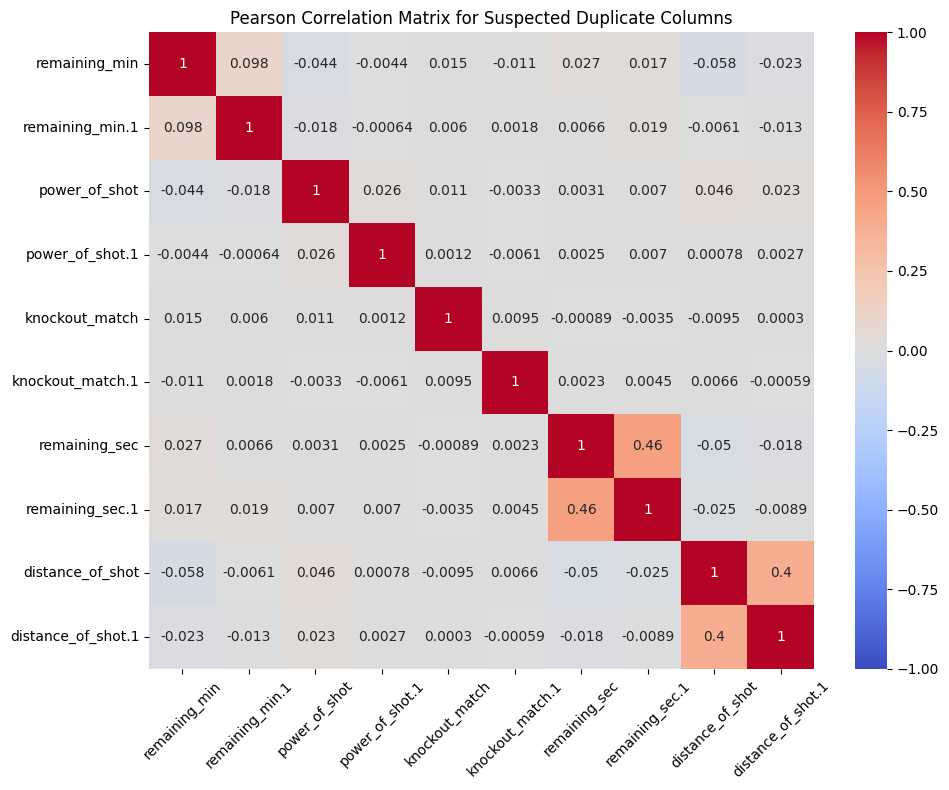

In [43]:

#DATA PREPROCESSING
# A. Drop Unnecessary/Duplicate Columns
# List of suspected duplicate columns (ensure these columns exist in your DataFrame)
dup_cols = [
    'remaining_min', 'remaining_min.1',
    'power_of_shot', 'power_of_shot.1',
    'knockout_match', 'knockout_match.1',
    'remaining_sec', 'remaining_sec.1',
    'distance_of_shot', 'distance_of_shot.1'
]
# --- Before Dropping Duplicate Columns, Check Their Correlations ---
# Calculate the Pearson correlation matrix for these columns
dup_corr = data[dup_cols].corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotation using seaborn
sns.heatmap(dup_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Pearson Correlation Matrix for Suspected Duplicate Columns")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [44]:
#Since the columns have are weakly positively correlated, we can check if some values in duplicated columns indicated outliers
# (Dropping duplicate columns like 'remaining_min.1', etc)
data.drop(['remaining_min.1', 'power_of_shot.1',
           'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'], 
          axis=1, inplace=True)
print("Columns after drop:", data.columns.tolist())


Columns after drop: ['match_event_id', 'location_x', 'location_y', 'remaining_min', 'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot', 'team_name', 'date_of_game', 'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot', 'match_id', 'team_id']


In [ ]:
# B. Convert Data Types
# Convert date_of_game to datetime (invalid parsing becomes NaT)
data['date_of_game'] = pd.to_datetime(data.date_of_game, errors='coerce')
# Ensure game_season remains object before encoding
data['game_season'] = data['game_season'].astype('object')

# Label encode game_season (replace season strings with integers)
l_unique = data['game_season'].unique()
v_unique = np.arange(len(l_unique))
data['game_season'].replace(to_replace=l_unique, value=v_unique, inplace=True)
data['game_season'] = data['game_season'].astype('int')
print("Unique game_season values (encoded):", data['game_season'].unique())